**Newton's laws of motion and law of universal gravitation**
In this case, a satellite of negligible mass orbits a planet. The satellite is assumed to have no gravitational effect on the planet, while its motion is dominated entirely by the planet's gravity.

The satellite's motion is governed by the following equations:

$$\ddot{\vec{r}} = \vec{a} = \frac{GM}{r^2} \hat r$$
$$\dot{\vec{r}} = \vec{v}$$
$$\vec{r} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}$$

**Euler's method:**
Let the subscript represent the discretization timestep.

Given initial conditions, use forward difference:

$$t_0 = 0$$
$$\vec{r}_0 = \begin{bmatrix} x_0 \\ y_0 \\ z_0 \end{bmatrix}$$

$$\dot{\vec{r}}_{n+1} = \dot{\vec{r}}_{n} + \ddot{\vec{r}}_{n} \Delta t$$
$$\vec{r}_{n+1} = \vec{r}_{n} + \dot{\vec{r}}_{n} \Delta t$$

In [74]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit

@jit
def euler_sat_planet(nt, dt, p, v, a, out, verbose=False):
    for n in range(1, nt):
        t = n * dt

        r = p[0] - p[1]
        rNorm = np.linalg.norm(r)

        a[1] = (G * m[0] / rNorm**2) * (r / rNorm)
        v[1] = v[1] + a[1] * dt
        p[1] = p[1] + v[1] * dt

        if t % writeInterval == 0:
            out.write("{}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n".format(t, p[1][0], p[1][1], p[1][2], v[1][0], v[1][1], v[1][2], a[1][0], a[1][1], a[1][2]))
            if verbose:
                print("Step {}: t = {} s".format(n, t))
                print("x, y, z = {}, {}, {}".format(p[1][0], p[1][1], p[1][2]))
                print("u, v, w = {}, {}, {}".format(v[1][0], v[1][1], v[1][2]))
                print("a, b, c = {}, {}, {}".format(a[1][0], a[1][1], a[1][2]))
                print()

## Solver settings
outputFile = "out.csv"

objects = ["Earth", "Shuttle"]
m = [5.972E+24, 100E+3]

dt = 0.01
tStop =  3 * 3600
writeInterval = 20

## Constants
G = 6.674E-11			# [m^3 kg^-1 s^-2]

# Position array (x, y, z) [m]
p = np.zeros((len(objects), 3))

# Velocity array (u, v, w) [m/s]
v = np.zeros_like(p)

# Acceleration array (a, b, c) [m/s^2]
a = np.zeros_like(p)

p0 = np.zeros_like(p)
pfinal = np.zeros_like(p)

In [75]:
## IC's
p0[0] = [0, 0, 0]
p0[1] = [6786.1E+3, 0, 5E+6]

v[0] = [0, 0, 0]
v[1] = [0, 10000, 0]

p[0] = p0[0]
p[1] = p0[1]

In [76]:
## Setup
nt = int(tStop / dt + 1)

In [77]:
## Solver
with open(outputFile, "w") as out:
    out.write("t, x, y, z, x', y', z', x'', y'', z''\n")
    euler_sat_planet(nt, dt, p, v, a, out)

In [78]:
## Load results
results = np.genfromtxt(outputFile, delimiter=',', unpack=True)
# Drop table header, keep only first four columns
results = results[0:5, 1:]

<IPython.core.display.Javascript object>


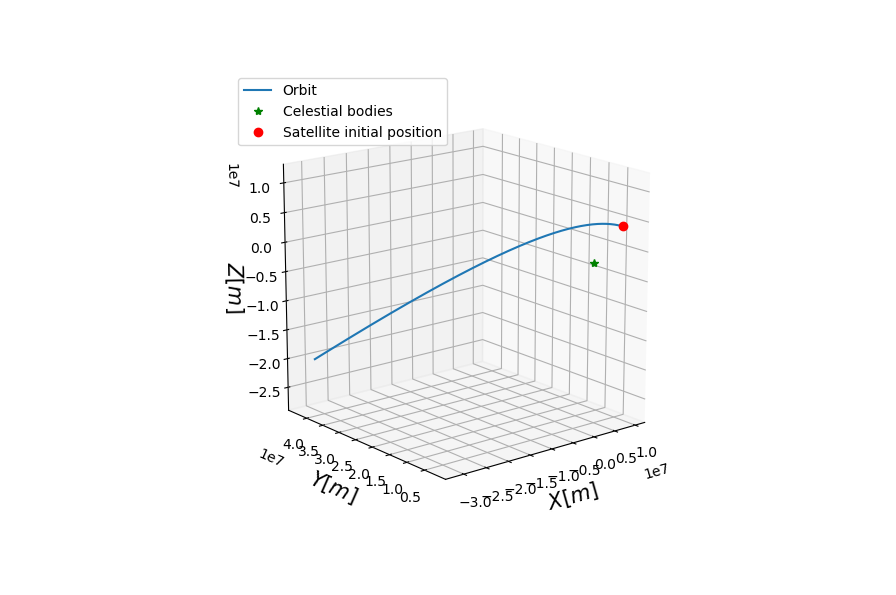

In [79]:
## Graph settings
fontSize = 15

## Graph
plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(results[1], results[2], results[3], label='Orbit')
ax.plot([0], [0], [0], 'g*', label = 'Celestial bodies')
ax.plot([p0[1][0]], [p0[1][1]], [p0[1][2]], 'ro', label = 'Satellite initial position')

ax.legend()

ax.set_xlabel('$X [m]$', fontsize=fontSize)
ax.set_ylabel('$Y [m]$', fontsize=fontSize)
ax.set_zlabel('$Z [m]$', fontsize=fontSize)

ax.set_aspect('equal')

# Create cubic bounding box to simulate equal aspect ratio
max_range = np.array([results[1].max()-results[1].min(), results[2].max()-results[2].min(), \
                      results[3].max()-results[3].min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(results[1].max()+results[1].min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(results[2].max()+results[2].min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(results[3].max()+results[3].min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'w')

plt.show()